# SVCs for barely linearly separable data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## a. Generate data and scatterplot

In [2]:
data = pd.DataFrame({'X_1': np.random.uniform(size=1000), 'X_2': np.random.uniform(size=1000),
                     'Y': np.zeros(1000)})

np.random.seed(27)

for i in data.index:
    X_1, X_2 = data.loc[i, 'X_1'], data.loc[i, 'X_2']
    if X_1 + X_2 > 1.05:
        data.loc[i, 'Y'] = 1
    elif X_1 + X_2 < 0.95:
        data.loc[i, 'Y'] = -1
    else:
        data.loc[i, 'Y'] = np.random.choice([-1, 1])
        
data.loc[:, 'Y'] = pd.to_numeric(data['Y'], downcast='integer')
data.head()

,X_1,X_2,Y
0,0.349514,0.564869,-1
1,0.336660,0.669171,1
2,0.452217,0.179149,-1
3,0.724898,0.141218,-1
4,0.509156,0.747757,1


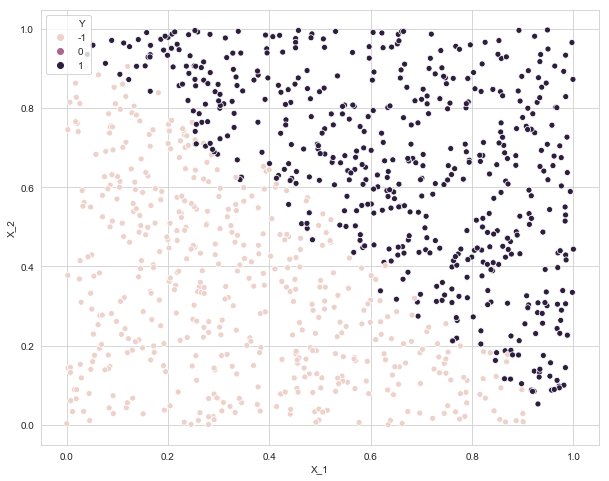

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='Y')


## b. Cross-validation error for SVC as a function of `cost` parameter

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# cost parameter
params = {'C': np.linspace(1, 50, 1000)}

# fit model
svc = SVC(kernel='linear')
svc_search = GridSearchCV(svc, 
                          param_grid=params,
                          cv=10,
                          scoring='accuracy')
svc_search.fit(data[['X_1', 'X_2']], data['Y'])

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([ 1.     ,  1.04905, ..., 49.95095, 50.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
svc_search_df = pd.DataFrame(svc_search.cv_results_)
svc_search_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005417,0.001175,0.001424,0.000477,1,{'C': 1.0},0.950495,0.950495,0.940594,0.93,...,0.952169,0.956667,0.951111,0.952222,0.953333,0.957825,0.952275,0.948946,0.953334,0.002893
1,0.004414,0.000236,0.001259,0.000308,1.04905,{'C': 1.049049049049049},0.950495,0.950495,0.950495,0.93,...,0.952169,0.957778,0.951111,0.953333,0.953333,0.957825,0.952275,0.950055,0.953667,0.002855
2,0.004460,0.000329,0.001215,0.000190,1.0981,{'C': 1.098098098098098},0.950495,0.950495,0.950495,0.93,...,0.951057,0.957778,0.951111,0.953333,0.953333,0.956715,0.953385,0.952275,0.953555,0.002108
3,0.004940,0.000989,0.001507,0.000670,1.14715,{'C': 1.147147147147147},0.950495,0.950495,0.950495,0.93,...,0.952169,0.957778,0.951111,0.954444,0.953333,0.956715,0.952275,0.951165,0.954000,0.002438
4,0.005254,0.000438,0.001622,0.000398,1.1962,{'C': 1.1961961961961962},0.950495,0.950495,0.960396,0.93,...,0.953281,0.957778,0.951111,0.954444,0.952222,0.956715,0.952275,0.952275,0.954111,0.002326


Text(0.5, 0, 'log(C)')

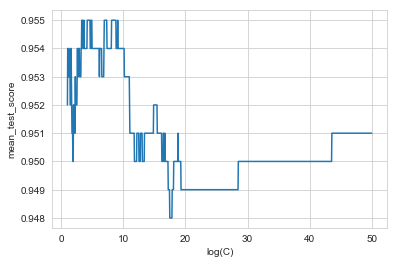

In [34]:
sns.lineplot(x=np.linspace(1, 50, 1000), y=svc_search_df['mean_test_score'])
plt.xlabel('log(C)')

In [35]:
svc_search.best_params_

{'C': 3.305305305305305}

In [36]:
svc_search.best_score_

0.955

## c. Test error for SVC as a function of `cost` parameter

In [37]:
# generate test data
np.random.seed(27)
test_data = pd.DataFrame({'X_1': np.random.uniform(size=1000), 'X_2': np.random.uniform(size=1000),
                     'Y': np.zeros(1000)})

for i in test_data.index:
    X_1, X_2 = test_data.loc[i, 'X_1'], test_data.loc[i, 'X_2']
    if X_1 + X_2 > 1.05:
        test_data.loc[i, 'Y'] = 1
    elif X_1 + X_2 < 0.95:
        test_data.loc[i, 'Y'] = -1
    else:
        test_data.loc[i, 'Y'] = np.random.choice([-1, 1])
        
test_data.loc[:, 'Y'] = pd.to_numeric(test_data['Y'], downcast='integer')

In [38]:
from sklearn.metrics import accuracy_score

# train and test data
X_train, Y_train = data[['X_1', 'X_2']], data['Y']
X_test, Y_test = test_data[['X_1', 'X_2']], test_data['Y']

# trained models
svcs = {C: SVC(kernel='linear', C=C).fit(X_train, Y_train) for C in np.linspace(1, 50, 1000)}

# errors df
svcs_train_errors = np.array([accuracy_score(svcs[C].predict(X_train), Y_train) for C in svcs])
svcs_test_errors = np.array([accuracy_score(svcs[C].predict(X_test), Y_test) for C in svcs])
svcs_errors_df = pd.DataFrame({'C': np.linspace(1, 50, 1000), 
                               'train_error': svcs_train_errors,
                               'cv_error': svc_search_df['mean_test_score'],
                               'test_error': svcs_test_errors
                                })
svcs_errors_df.head()

,C,train_error,cv_error,test_error
0,1.000000,0.953,0.952,0.954
1,1.049049,0.954,0.954,0.954
2,1.098098,0.954,0.953,0.954
3,1.147147,0.954,0.953,0.953
4,1.196196,0.954,0.954,0.954


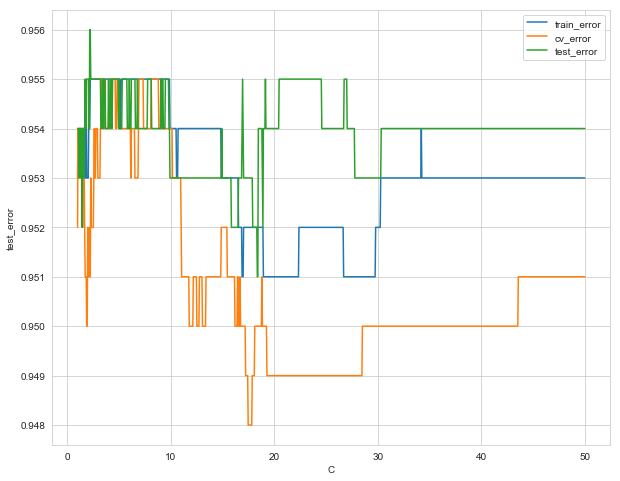

In [39]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='C', y='train_error', data=svcs_errors_df, label='train_error')
sns.lineplot(x='C', y='cv_error', data=svcs_errors_df, label='cv_error')
sns.lineplot(x='C', y='test_error', data=svcs_errors_df, label='test_error')
plt.legend()